In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import numpy as np 
import pandas as pd

In [ ]:
!unzip /content/drive/MyDrive/GTSRB.zip

In [ ]:
!unzip /content/drive/MyDrive/GTSRB_Online-Test-Images-Sorted.zip

In [45]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [46]:
data=[]
labels=[]
test_data=[]
test_labels=[]

height = 30
width = 30
channels = 3
classes = 43
n_inputs = height * width * channels

for i in range(classes) :
    path = "/content/GTSRB/{0}/".format(i)
    print(path)
    Class=os.listdir(path)
    for a in Class:
        try:
            image=cv2.imread(path+a)
            image_from_array = Image.fromarray(image, 'RGB')
            size_image = image_from_array.resize((height, width))
            data.append(np.array(size_image))
            labels.append(i)
        except AttributeError:
            print(" ")
            
for i in range(classes) :
    path = "/content/GTSRB/Online-Test-sort/{0}/".format(i)
    print(path)
    Class=os.listdir(path)
    for a in Class:
        try:
            image=cv2.imread(path+a)
            image_from_array = Image.fromarray(image, 'RGB')
            size_image = image_from_array.resize((height, width))
            test_data.append(np.array(size_image))
            test_labels.append(i)
        except AttributeError:
            print(" ")

Cells=np.array(data)
labels=np.array(labels)
Test_cells=np.array(test_data)
Test_labels=np.array(test_labels)

#Randomize the order of the input images
s=np.arange(Cells.shape[0])
t=np.arange(Test_cells.shape[0])
np.random.seed(42)
np.random.shuffle(s)
np.random.shuffle(t)
Cells=Cells[s]
labels=labels[s]
Test_cells=Test_cells[t]
Test_labels=Test_labels[t]

/content/GTSRB/0/
/content/GTSRB/1/
/content/GTSRB/2/
/content/GTSRB/3/
/content/GTSRB/4/
/content/GTSRB/5/
/content/GTSRB/6/
/content/GTSRB/7/
/content/GTSRB/8/
/content/GTSRB/9/
/content/GTSRB/10/
/content/GTSRB/11/
/content/GTSRB/12/
/content/GTSRB/13/
/content/GTSRB/14/
/content/GTSRB/15/
/content/GTSRB/16/
/content/GTSRB/17/
/content/GTSRB/18/
/content/GTSRB/19/
/content/GTSRB/20/
/content/GTSRB/21/
/content/GTSRB/22/
/content/GTSRB/23/
/content/GTSRB/24/
/content/GTSRB/25/
/content/GTSRB/26/
/content/GTSRB/27/
/content/GTSRB/28/
/content/GTSRB/29/
/content/GTSRB/30/
/content/GTSRB/31/
/content/GTSRB/32/
/content/GTSRB/33/
/content/GTSRB/34/
/content/GTSRB/35/
/content/GTSRB/36/
/content/GTSRB/37/
/content/GTSRB/38/
/content/GTSRB/39/
/content/GTSRB/40/
/content/GTSRB/41/
/content/GTSRB/42/
/content/GTSRB/Online-Test-sort/0/
 
/content/GTSRB/Online-Test-sort/1/
 
/content/GTSRB/Online-Test-sort/2/
 
/content/GTSRB/Online-Test-sort/3/
 
/content/GTSRB/Online-Test-sort/4/
 
/content

In [47]:
(X_train,X_val)=Cells[(int)(0.15*len(labels)):],Cells[:(int)(0.15*len(labels))]
(X_test_final)=Test_cells[(int)(0.15*len(test_labels)):]

X_train = X_train.astype('float32')/255 
X_val = X_val.astype('float32')/255
X_test_final = X_test.astype('float32')/255

(y_train,y_val)=labels[(int)(0.15*len(labels)):],labels[:(int)(0.15*len(labels))]
(y_test_final)=Test_labels[(int)(0.15*len(labels)):]

print(X_train.shape)
print(X_val.shape)
print(X_test_final.shape)
print(y_test_final.shape)


(33328, 30, 30, 3)
(5881, 30, 30, 3)
(5881, 30, 30, 3)
(6688,)


In [49]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

In [50]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.3))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(2, 2), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 128)         32896     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 128)        

In [51]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

In [53]:
#creating a mapping of layer name ot layer details 
#we will create a dictionary layers_info which maps a layer name to its charcteristics
layers_info = {}
for i in model.layers:
    layers_info[i.name] = i.get_config()

#here the layer_weights dictionary will map every layer_name to its corresponding weights
layer_weights = {}
for i in model.layers:
    layer_weights[i.name] = i.get_weights()

print(layers_info['conv2d_15'])

{'name': 'conv2d_15', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': (2, 2), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}


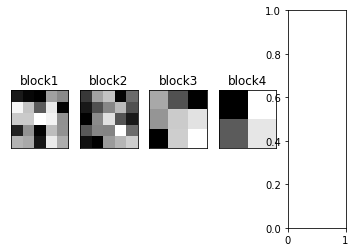

In [54]:
layers = model.layers
layer_ids = [0,1,4,5]
#plot the filters
fig,ax = plt.subplots(nrows=1,ncols=5)
for i in range(4):
    ax[i].imshow(layers[layer_ids[i]].get_weights()[0][:,:,:,0][:,:,0],cmap='gray')
    ax[i].set_title('block'+str(i+1))
    ax[i].set_xticks([])
    ax[i].set_yticks([])

In [57]:
X_test=X_val

y_test=y_val

In [58]:
epochs = 20
history = model.fit(X_train,
                    y_train,
                    batch_size=32,
                    epochs=epochs,
                    validation_data=(X_test, y_test))

Epoch 1/20


ValueError: ignored

In [18]:
model.save("model.h5")

In [40]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 43.75%


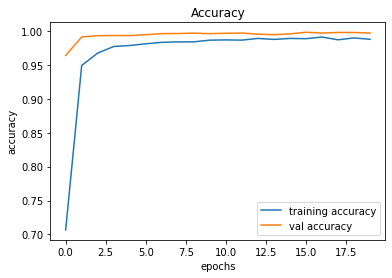

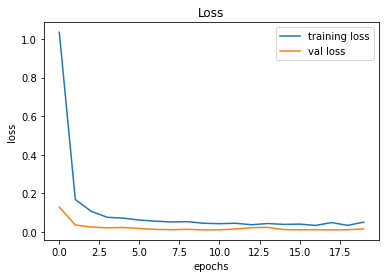

In [20]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
scores = model.evaluate(X_test_final, y_test_final, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))